In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np
import statsmodels.api as sm


In [2]:
df=pd.read_csv('data.csv')


In [3]:
df=df.rename(columns={'age':'Age','gender':'Gender','time_spent':'Time spent','platform':'Platform','interests':'Interests','location':'Country','demographics':'Area Type','profession':'Profession','income':'Income','indebt':'Indebt','isHomeOwner':'Home Owner','Owns_Car':'Car Owner'})

# Data Exploration and Cleaning

In [4]:
df 

,Age,Gender,Time spent,Platform,Interests,Country,Area Type,Profession,Income,Indebt,Home Owner,Car Owner
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         1000 non-null   int64 
 1   Gender      1000 non-null   object
 2   Time spent  1000 non-null   int64 
 3   Platform    1000 non-null   object
 4   Interests   1000 non-null   object
 5   Country     1000 non-null   object
 6   Area Type   1000 non-null   object
 7   Profession  1000 non-null   object
 8   Income      1000 non-null   int64 
 9   Indebt      1000 non-null   bool  
 10  Home Owner  1000 non-null   bool  
 11  Car Owner   1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [6]:
df.isnull().sum() #checking for missing data


Age           0
Gender        0
Time spent    0
Platform      0
Interests     0
Country       0
Area Type     0
Profession    0
Income        0
Indebt        0
Home Owner    0
Car Owner     0
dtype: int64

In [7]:
df.duplicated().sum() #checking for duplicated data

0

In [8]:
df.describe () #to check if the numerical columns have any outliers

,Age,Time spent,Income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [9]:
print(f"The Categorical columns descriptive summary:")  
List=['Gender','Platform','Interests','Country','Platform','Area Type','Profession','Indebt','Home Owner','Car Owner']
for column in List:
    print(f"counts for {column}: {df[column].value_counts()}")
 #to check if the categorical columns have well collected data and have no outliers

The Categorical columns descriptive summary:
counts for Gender: Gender
male          337
non-binary    332
female        331
Name: count, dtype: int64
counts for Platform: Platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64
counts for Interests: Interests
Lifestlye    341
Sports       331
Travel       328
Name: count, dtype: int64
counts for Country: Country
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64
counts for Platform: Platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64
counts for Area Type: Area Type
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64
counts for Profession: Profession
Marketer Manager     355
Software Engineer    336
Student              309
Name: count, dtype: int64
counts for Indebt: Indebt
False    503
True     497
Name: count, dtype: int64
counts for Home Owner: Home Owner
True     508
False    492
Name: count, dtype: int6

In [10]:
categorical_col= ['Indebt','Home Owner','Car Owner']
df[categorical_col]=df[categorical_col].astype(str)

for item in categorical_col:
    df[item].replace({'False':0,'True':1}, inplace=True) #changed the data type to boolean

# Feature Engineering

In [11]:
# Finding Q1 and Q3 for the Age column
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)

# Define the bins 
bins=[0, Q1 , Q3, float('inf')]

#identify labels
labels=['Young', 'Adult' , 'Senior']
# Categorizing 
df['Age groups']=pd.cut(df['Age'],bins=bins, labels=labels)

In [12]:
# Finding Q1 and Q3 for Time spent column
Q1=df['Time spent'].quantile(0.25)
Q3=df['Time spent'].quantile(0.75)

# Define the bins 
bins=[0, Q1 , Q3, float('inf')]

#identify labels
labels=['Minimal', 'Moderate' , 'Heavy']
# Categorize the time spent to minimal usage, moderate usage, heavy usage 
df['Social Media Usage']=pd.cut(df['Time spent'],bins=bins, labels=labels)

In [13]:
df

,Age,Gender,Time spent,Platform,Interests,Country,Area Type,Profession,Income,Indebt,Home Owner,Car Owner,Age groups,Social Media Usage
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,1,0,0,Senior,Minimal
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,1,1,1,Adult,Minimal
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,0,0,0,Adult,Heavy
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,0,1,0,Senior,Moderate
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,0,1,1,Young,Minimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,0,1,0,Young,Heavy
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,1,0,0,Adult,Moderate
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,1,0,1,Young,Moderate
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,1,1,0,Senior,Moderate


# Impact of Social Media Usage on Demographics:

Study Objective: Investigate how social media usage patterns vary across different demographic groups.

Outcome: Identify demographic factors that are associated with specific social media usage behaviors

In [14]:
def Association(df,list1,list2):
    
   #chi-square test 
    Associated=[]
    for item1 in list1:
        for item2 in list2:
            contingency_table=pd.crosstab(df[item1],df[item2])
            print(contingency_table)
            chi2_stat,p_value,dof,expected=chi2_contingency(contingency_table)
            print(f"The chi-square test between {item2} and {item1} is:")
            print("Chi-square statistic:", chi2_stat)
            print("P-value:", p_value)
            print("Degrees of freedom:", dof)
            print("Expected frequencies:\n", expected)
            if p_value <0.05:
                print(f"The {item1} and {item2} are associated ")
                Associated.append((item1,item2)) #Associated variables
            else:
                print(f"The {item1} and {item2} are not associated ")
            #visualization of Association
            contingency_table.plot(kind='bar')
            plt.title('Association figure')
            plt.xlabel(item1)
            plt.ylabel(item2)
            plt.show()
            
    return Associated
   

Social Media Usage  Minimal  Moderate  Heavy
Age groups                                  
Young                    80       120     55
Adult                   154       235    113
Senior                   84       107     52
The chi-square test between Social Media Usage and Age groups is:
Chi-square statistic: 1.2483686105677771
P-value: 0.8700726356997999
Degrees of freedom: 4
Expected frequencies:
 [[ 81.09  117.81   56.1  ]
 [159.636 231.924 110.44 ]
 [ 77.274 112.266  53.46 ]]
The Age groups and Social Media Usage are not associated 


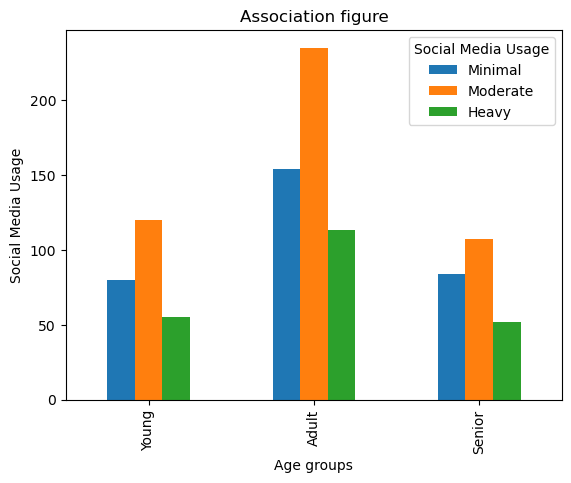

Platform    Facebook  Instagram  YouTube
Age groups                              
Young             77         99       79
Adult            158        170      174
Senior            72         94       77
The chi-square test between Platform and Age groups is:
Chi-square statistic: 2.719524520335429
P-value: 0.6058024213676901
Degrees of freedom: 4
Expected frequencies:
 [[ 78.285  92.565  84.15 ]
 [154.114 182.226 165.66 ]
 [ 74.601  88.209  80.19 ]]
The Age groups and Platform are not associated 


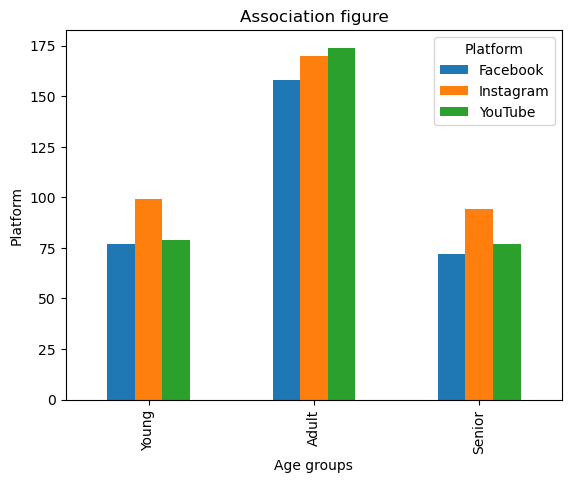

Interests   Lifestlye  Sports  Travel
Age groups                           
Young              87      88      80
Adult             165     169     168
Senior             89      74      80
The chi-square test between Interests and Age groups is:
Chi-square statistic: 1.6213212471657492
P-value: 0.804955035624075
Degrees of freedom: 4
Expected frequencies:
 [[ 86.955  84.405  83.64 ]
 [171.182 166.162 164.656]
 [ 82.863  80.433  79.704]]
The Age groups and Interests are not associated 


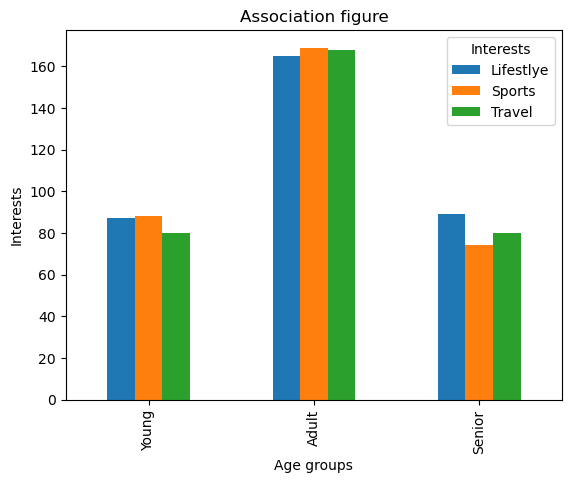

Social Media Usage  Minimal  Moderate  Heavy
Gender                                      
female                  103       147     81
male                    114       155     68
non-binary              101       160     71
The chi-square test between Social Media Usage and Gender is:
Chi-square statistic: 2.6847241895410776
P-value: 0.6118903174800261
Degrees of freedom: 4
Expected frequencies:
 [[105.258 152.922  72.82 ]
 [107.166 155.694  74.14 ]
 [105.576 153.384  73.04 ]]
The Gender and Social Media Usage are not associated 


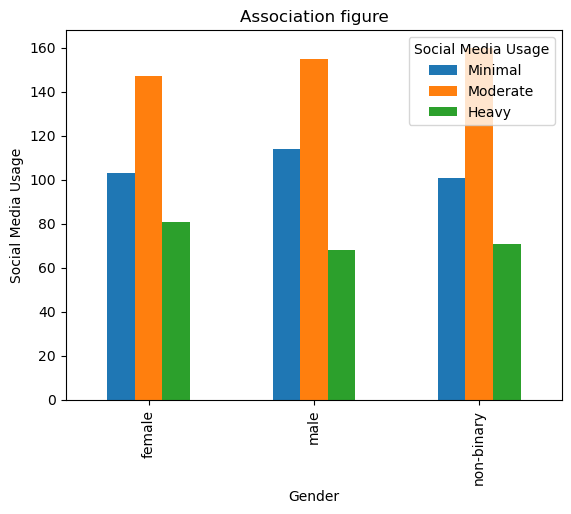

Platform    Facebook  Instagram  YouTube
Gender                                  
female            85        135      111
male             113        128       96
non-binary       109        100      123
The chi-square test between Platform and Gender is:
Chi-square statistic: 13.43592196946172
P-value: 0.009331021573307117
Degrees of freedom: 4
Expected frequencies:
 [[101.617 120.153 109.23 ]
 [103.459 122.331 111.21 ]
 [101.924 120.516 109.56 ]]
The Gender and Platform are associated 


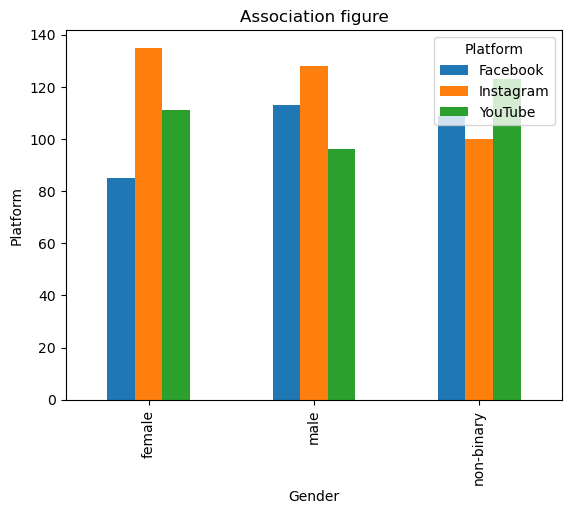

Interests   Lifestlye  Sports  Travel
Gender                               
female            122     109     100
male              108     110     119
non-binary        111     112     109
The chi-square test between Interests and Gender is:
Chi-square statistic: 2.587058664090742
P-value: 0.6291173285092097
Degrees of freedom: 4
Expected frequencies:
 [[112.871 109.561 108.568]
 [114.917 111.547 110.536]
 [113.212 109.892 108.896]]
The Gender and Interests are not associated 


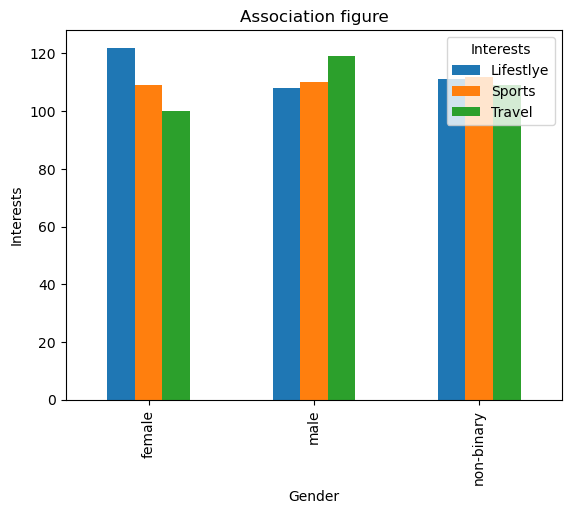

Social Media Usage  Minimal  Moderate  Heavy
Area Type                                   
Rural                   108       158     74
Sub_Urban                96       153     86
Urban                   114       151     60
The chi-square test between Social Media Usage and Area Type is:
Chi-square statistic: 6.079865821943448
P-value: 0.19326270973278342
Degrees of freedom: 4
Expected frequencies:
 [[108.12 157.08  74.8 ]
 [106.53 154.77  73.7 ]
 [103.35 150.15  71.5 ]]
The Area Type and Social Media Usage are not associated 


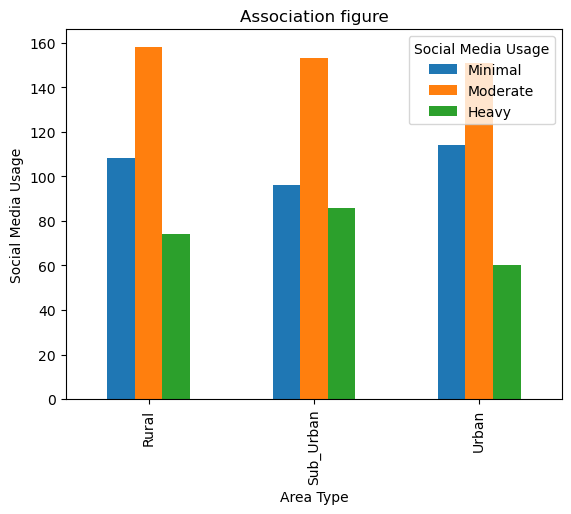

Platform   Facebook  Instagram  YouTube
Area Type                              
Rural            96        136      108
Sub_Urban       106        118      111
Urban           105        109      111
The chi-square test between Platform and Area Type is:
Chi-square statistic: 3.405261681087691
P-value: 0.4924289185752443
Degrees of freedom: 4
Expected frequencies:
 [[104.38  123.42  112.2  ]
 [102.845 121.605 110.55 ]
 [ 99.775 117.975 107.25 ]]
The Area Type and Platform are not associated 


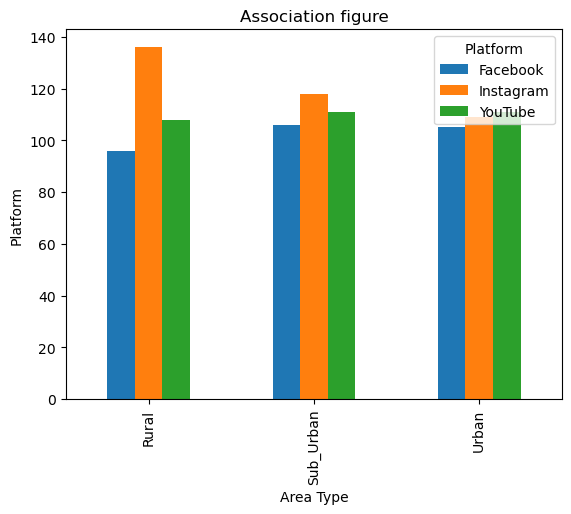

Interests  Lifestlye  Sports  Travel
Area Type                           
Rural            106     128     106
Sub_Urban        123     108     104
Urban            112      95     118
The chi-square test between Interests and Area Type is:
Chi-square statistic: 7.013005097417832
P-value: 0.13520255952805926
Degrees of freedom: 4
Expected frequencies:
 [[115.94  112.54  111.52 ]
 [114.235 110.885 109.88 ]
 [110.825 107.575 106.6  ]]
The Area Type and Interests are not associated 


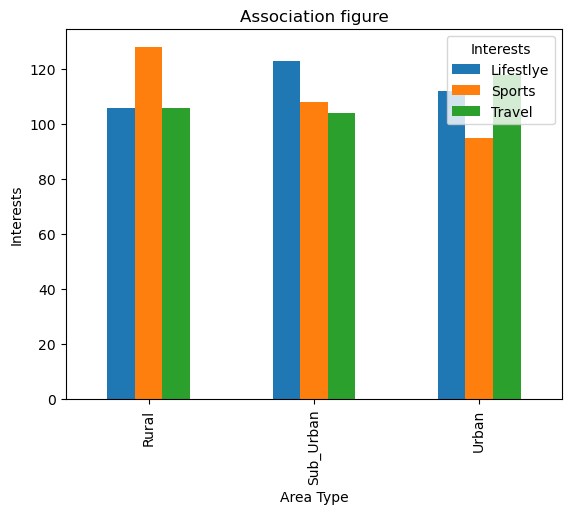

Social Media Usage  Minimal  Moderate  Heavy
Country                                     
Australia                91       185     76
United Kingdom          114       142     73
United States           113       135     71
The chi-square test between Social Media Usage and Country is:
Chi-square statistic: 10.890979242509374
P-value: 0.0278169698409511
Degrees of freedom: 4
Expected frequencies:
 [[111.936 162.624  77.44 ]
 [104.622 151.998  72.38 ]
 [101.442 147.378  70.18 ]]
The Country and Social Media Usage are associated 


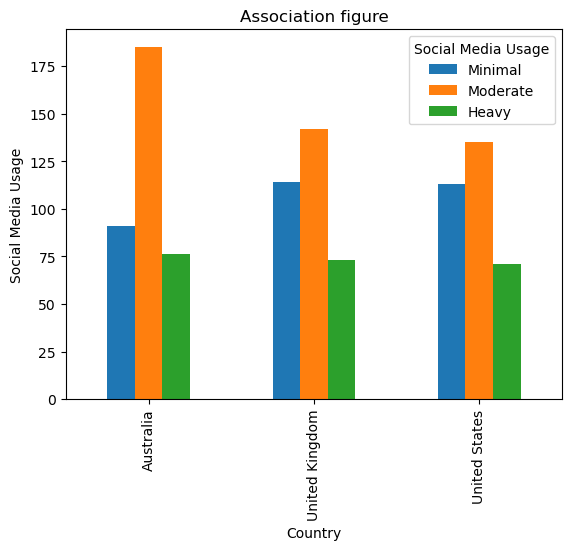

Platform        Facebook  Instagram  YouTube
Country                                     
Australia            106        125      121
United Kingdom       107        117      105
United States         94        121      104
The chi-square test between Platform and Country is:
Chi-square statistic: 1.231230642950079
P-value: 0.8729304157581005
Degrees of freedom: 4
Expected frequencies:
 [[108.064 127.776 116.16 ]
 [101.003 119.427 108.57 ]
 [ 97.933 115.797 105.27 ]]
The Country and Platform are not associated 


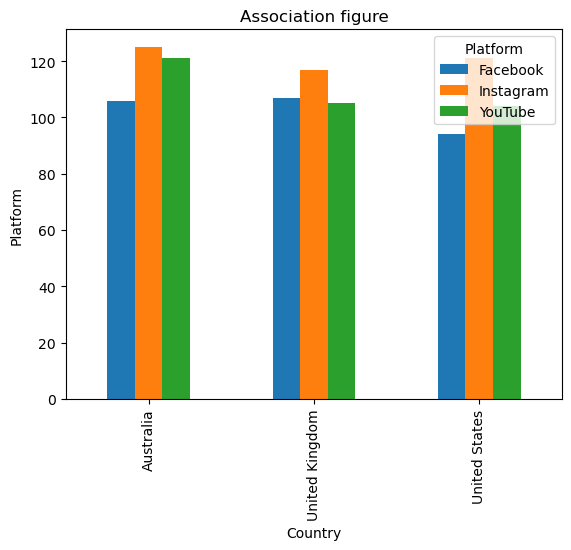

Interests       Lifestlye  Sports  Travel
Country                                  
Australia             116     116     120
United Kingdom        110     108     111
United States         115     107      97
The chi-square test between Interests and Country is:
Chi-square statistic: 1.3863445360868834
P-value: 0.8465648955724661
Degrees of freedom: 4
Expected frequencies:
 [[120.032 116.512 115.456]
 [112.189 108.899 107.912]
 [108.779 105.589 104.632]]
The Country and Interests are not associated 


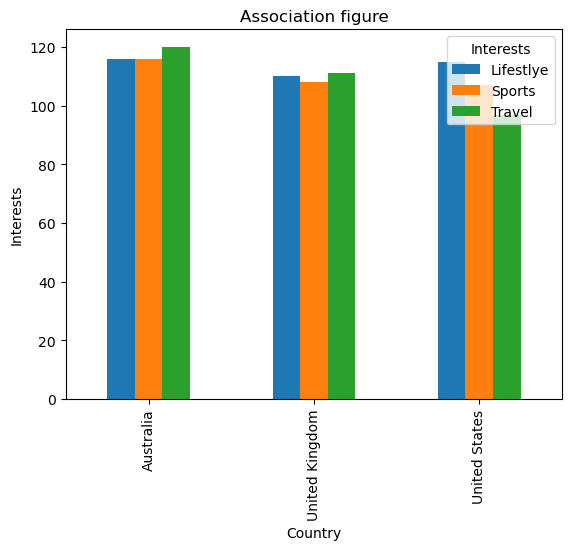

Social Media Usage  Minimal  Moderate  Heavy
Profession                                  
Marketer Manager        112       159     84
Software Engineer       111       156     69
Student                  95       147     67
The chi-square test between Social Media Usage and Profession is:
Chi-square statistic: 1.3468423351418428
P-value: 0.8533794118841607
Degrees of freedom: 4
Expected frequencies:
 [[112.89  164.01   78.1  ]
 [106.848 155.232  73.92 ]
 [ 98.262 142.758  67.98 ]]
The Profession and Social Media Usage are not associated 


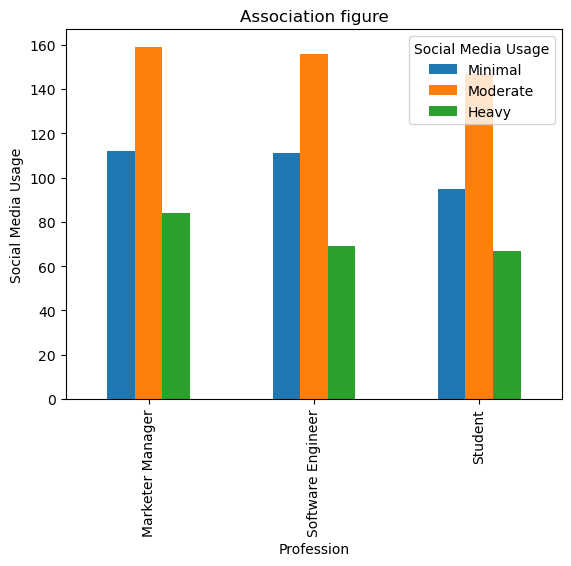

Platform           Facebook  Instagram  YouTube
Profession                                     
Marketer Manager        110        128      117
Software Engineer        94        128      114
Student                 103        107       99
The chi-square test between Platform and Profession is:
Chi-square statistic: 2.236042449661044
P-value: 0.6924363513622009
Degrees of freedom: 4
Expected frequencies:
 [[108.985 128.865 117.15 ]
 [103.152 121.968 110.88 ]
 [ 94.863 112.167 101.97 ]]
The Profession and Platform are not associated 


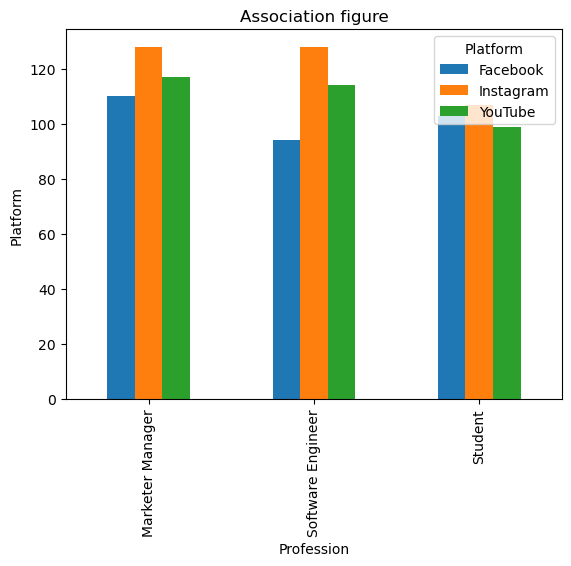

Interests          Lifestlye  Sports  Travel
Profession                                  
Marketer Manager         122     121     112
Software Engineer        105     117     114
Student                  114      93     102
The chi-square test between Interests and Profession is:
Chi-square statistic: 3.0651950492247093
P-value: 0.5469750669801738
Degrees of freedom: 4
Expected frequencies:
 [[121.055 117.505 116.44 ]
 [114.576 111.216 110.208]
 [105.369 102.279 101.352]]
The Profession and Interests are not associated 


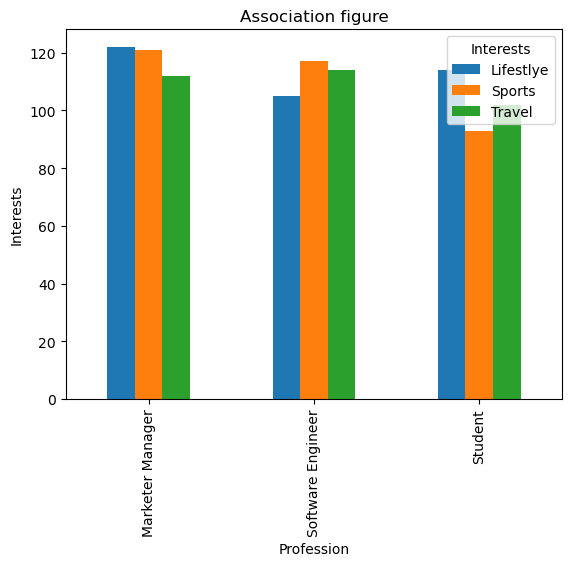

[('Gender', 'Platform'), ('Country', 'Social Media Usage')]

In [15]:
demographic_factors=['Age groups','Gender','Area Type','Country','Profession']
Socialmedia_behaviours=['Social Media Usage','Platform','Interests']
Association(df,demographic_factors,Socialmedia_behaviours)

# Effect of Social Media Usage on Financial Behavior:

Study Objective: Explore the relationship between social media usage and financial behavior, including income, debt status, homeownership, and car ownership.

Outcome: Determine if there is a correlation between social media usage patterns and financial outcomes, such as debt levels, saving habits, or purchase decisions.


In [17]:
y = df['Time spent']
X = df[['Income', 'Indebt', 'Home Owner', 'Car Owner']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Time spent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3402
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.851
Time:                        22:27:08   Log-Likelihood:                -2349.1
No. Observations:                1000   AIC:                             4708.
Df Residuals:                     995   BIC:                             4733.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9211      0.436     11.282      0.0

The results suggest that there is no significant relationship between the time people spend on social media and their financial behavior, including factors like income, debt status, homeownership, and car ownership. This means that the amount of time someone spends on social media does not appear to be associated with how much money they make, whether they're in debt, if they own a home or car. The model couldn't find any meaningful connection between these variables.

In [18]:
correlation_matrix = df[['Time spent', 'Income', 'Indebt', 'Home Owner', 'Car Owner']].corr()
print(correlation_matrix)    

            Time spent    Income    Indebt  Home Owner  Car Owner
Time spent    1.000000  0.004757  0.013079    0.029388  -0.020271
Income        0.004757  1.000000  0.037860    0.006072   0.019789
Indebt        0.013079  0.037860  1.000000    0.038102  -0.035641
Home Owner    0.029388  0.006072  0.038102    1.000000  -0.051411
Car Owner    -0.020271  0.019789 -0.035641   -0.051411   1.000000


The correlation matrix shows that there is a weak positive correlation between time spent on social media with income, being indebt and owning a home also, there is a negative weak correlation with owning a car.

# Checking for Association: 

In [19]:
# Finding Q1 and Q3 for the income column
Q1=df['Income'].quantile(0.25)
Q3=df['Income'].quantile(0.75)

# Define the bins 
bins=[0, Q1 , Q3, float('inf')]

#identify labels
labels=['Low', 'Medium' , 'High']
# Categorizing 
df['Income groups']=pd.cut(df['Income'],bins=bins, labels=labels)

Income groups       Low  Medium  High
Social Media Usage                   
Minimal              75     161    82
Moderate            118     235   109
Heavy                57     104    59
The chi-square test between Income groups and Social Media Usage is:
Chi-square statistic: 1.5385771461243158
P-value: 0.8197867419035385
Degrees of freedom: 4
Expected frequencies:
 [[ 79.5 159.   79.5]
 [115.5 231.  115.5]
 [ 55.  110.   55. ]]
The Social Media Usage and Income groups are not associated 


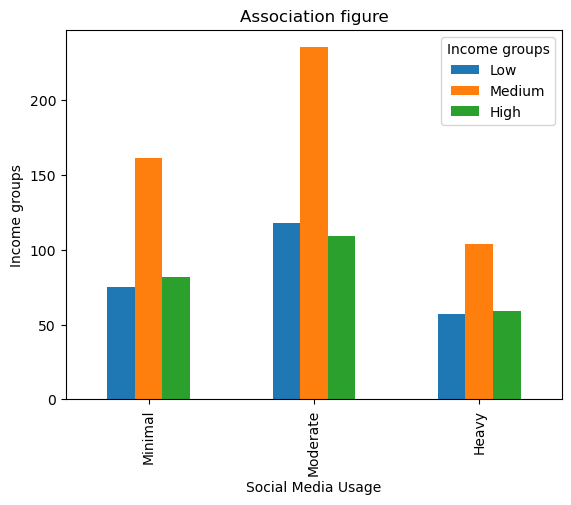

Home Owner            0    1
Social Media Usage          
Minimal             159  159
Moderate            231  231
Heavy               102  118
The chi-square test between Home Owner and Social Media Usage is:
Chi-square statistic: 0.9078687780435422
P-value: 0.6351244030122949
Degrees of freedom: 2
Expected frequencies:
 [[156.456 161.544]
 [227.304 234.696]
 [108.24  111.76 ]]
The Social Media Usage and Home Owner are not associated 


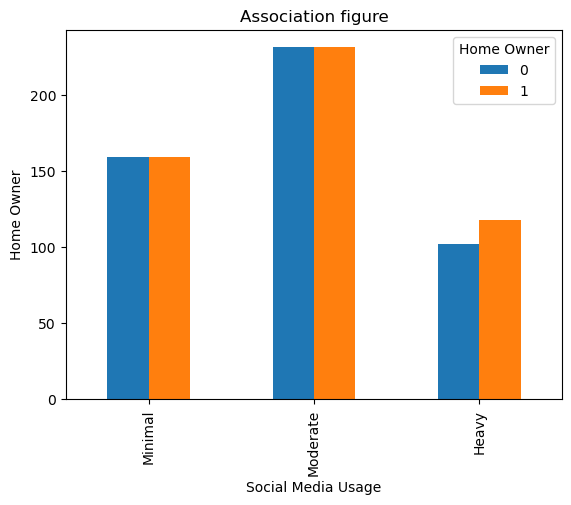

Car Owner             0    1
Social Media Usage          
Minimal             154  164
Moderate            200  262
Heavy               107  113
The chi-square test between Car Owner and Social Media Usage is:
Chi-square statistic: 2.7310638854668934
P-value: 0.2552448642184676
Degrees of freedom: 2
Expected frequencies:
 [[146.598 171.402]
 [212.982 249.018]
 [101.42  118.58 ]]
The Social Media Usage and Car Owner are not associated 


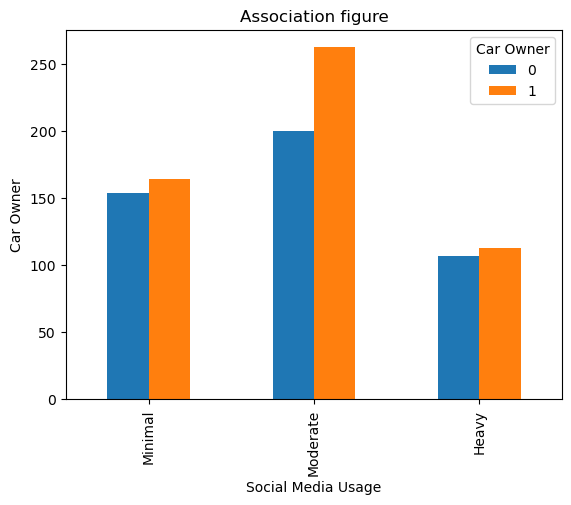

Income groups  Low  Medium  High
Platform                        
Facebook        67     160    80
Instagram      108     177    78
YouTube         75     163    92
The chi-square test between Income groups and Platform is:
Chi-square statistic: 8.633283979863785
P-value: 0.07094856573215416
Degrees of freedom: 4
Expected frequencies:
 [[ 76.75 153.5   76.75]
 [ 90.75 181.5   90.75]
 [ 82.5  165.    82.5 ]]
The Platform and Income groups are not associated 


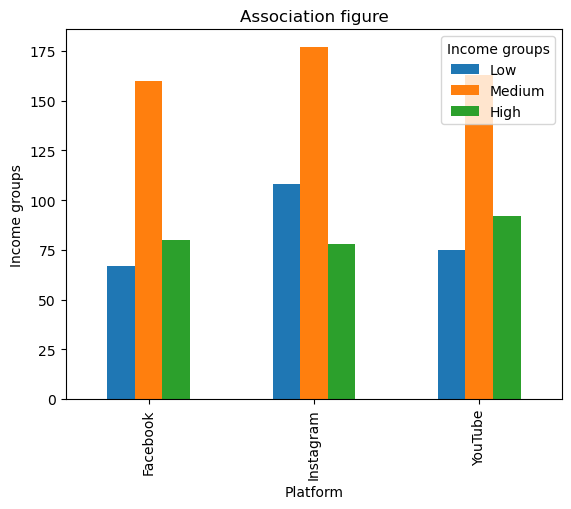

Home Owner    0    1
Platform            
Facebook    152  155
Instagram   194  169
YouTube     146  184
The chi-square test between Home Owner and Platform is:
Chi-square statistic: 5.872339941094001
P-value: 0.05306859427898205
Degrees of freedom: 2
Expected frequencies:
 [[151.044 155.956]
 [178.596 184.404]
 [162.36  167.64 ]]
The Platform and Home Owner are not associated 


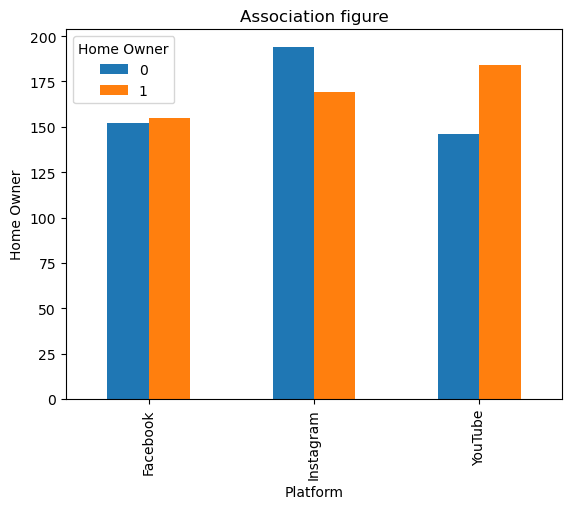

Car Owner    0    1
Platform           
Facebook   146  161
Instagram  173  190
YouTube    142  188
The chi-square test between Car Owner and Platform is:
Chi-square statistic: 1.8685316320606793
P-value: 0.3928742016136198
Degrees of freedom: 2
Expected frequencies:
 [[141.527 165.473]
 [167.343 195.657]
 [152.13  177.87 ]]
The Platform and Car Owner are not associated 


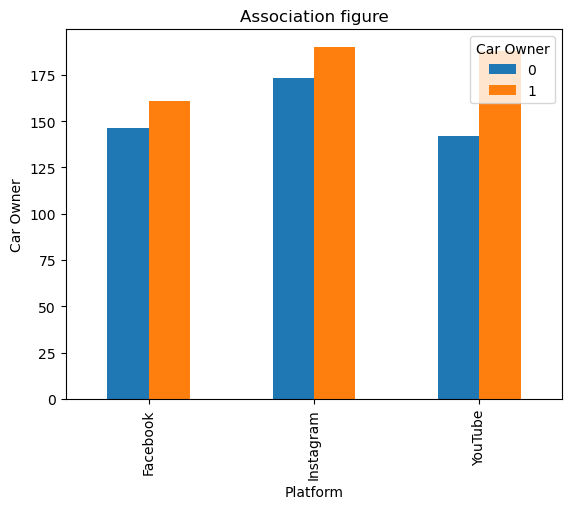

Income groups  Low  Medium  High
Interests                       
Lifestlye       81     168    92
Sports          92     162    77
Travel          77     170    81
The chi-square test between Income groups and Interests is:
Chi-square statistic: 2.827129438290334
P-value: 0.587158823320953
Degrees of freedom: 4
Expected frequencies:
 [[ 85.25 170.5   85.25]
 [ 82.75 165.5   82.75]
 [ 82.   164.    82.  ]]
The Interests and Income groups are not associated 


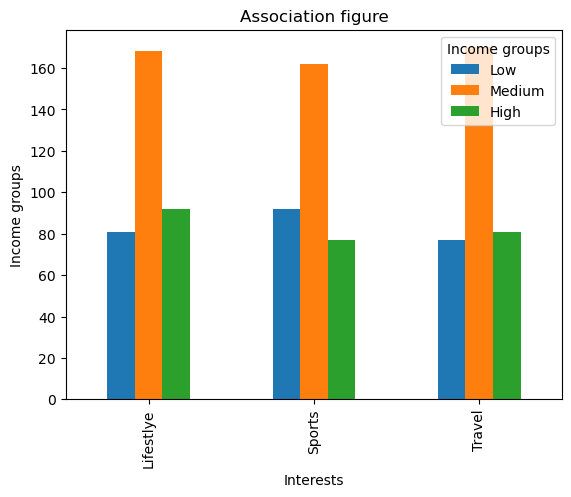

Home Owner    0    1
Interests           
Lifestlye   159  182
Sports      173  158
Travel      160  168
The chi-square test between Home Owner and Interests is:
Chi-square statistic: 2.1707556209094037
P-value: 0.3377741471804782
Degrees of freedom: 2
Expected frequencies:
 [[167.772 173.228]
 [162.852 168.148]
 [161.376 166.624]]
The Interests and Home Owner are not associated 


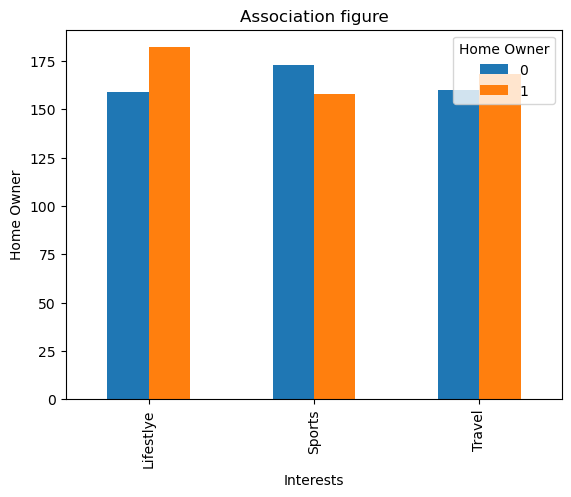

Car Owner    0    1
Interests          
Lifestlye  172  169
Sports     149  182
Travel     140  188
The chi-square test between Car Owner and Interests is:
Chi-square statistic: 4.28287040077797
P-value: 0.11748610586009216
Degrees of freedom: 2
Expected frequencies:
 [[157.201 183.799]
 [152.591 178.409]
 [151.208 176.792]]
The Interests and Car Owner are not associated 


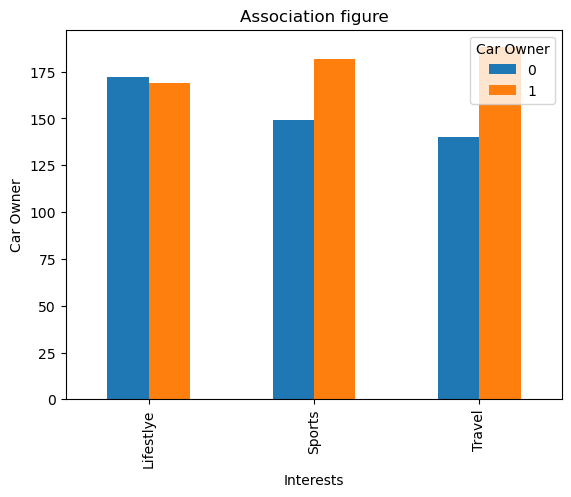

[]

In [20]:
Association(df,['Social Media Usage','Platform','Interests'],['Income groups','Home Owner','Car Owner'])

As in Study1 it was shown that there was an association between Country and social media usage, yet, in the second study there was no correlation between time spent on social media and income, 
trying to see if that will change if we try to see the association between social media usage and income according to the country:

In [21]:
#making dataframe for each country to run the association for each
Australia_df=df[df['Country']=='Australia']
USA_df=df[df['Country']=='United States']
UK_df=df[df['Country']=='United Kingdom']

Income groups       Low  Medium  High
Social Media Usage                   
Minimal              17      53    21
Moderate             46     104    35
Heavy                19      34    23
The chi-square test between Income groups and Social Media Usage is:
Chi-square statistic: 5.8995730542430405
P-value: 0.20677480148959354
Degrees of freedom: 4
Expected frequencies:
 [[ 21.19886364  49.37784091  20.42329545]
 [ 43.09659091 100.38352273  41.51988636]
 [ 17.70454545  41.23863636  17.05681818]]
The Social Media Usage and Income groups are not associated 


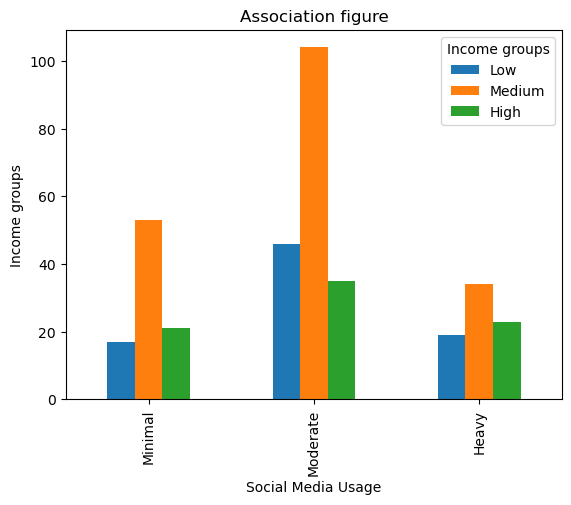

[]

In [22]:
Association(Australia_df,['Social Media Usage'],['Income groups'])

Income groups       Low  Medium  High
Social Media Usage                   
Minimal              29      57    27
Moderate             40      56    39
Heavy                21      32    18
The chi-square test between Income groups and Social Media Usage is:
Chi-square statistic: 2.1089744380555526
P-value: 0.7157238071308301
Degrees of freedom: 4
Expected frequencies:
 [[31.88087774 51.36363636 29.75548589]
 [38.08777429 61.36363636 35.54858934]
 [20.03134796 32.27272727 18.69592476]]
The Social Media Usage and Income groups are not associated 


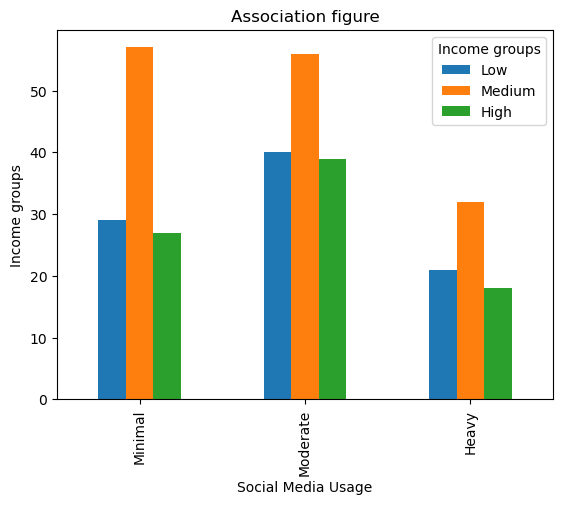

[]

In [23]:
Association(USA_df,['Social Media Usage'],['Income groups'])

Income groups       Low  Medium  High
Social Media Usage                   
Minimal              29      51    34
Moderate             32      75    35
Heavy                17      38    18
The chi-square test between Income groups and Social Media Usage is:
Chi-square statistic: 1.9056938650527677
P-value: 0.7530989446131298
Degrees of freedom: 4
Expected frequencies:
 [[27.02735562 56.82674772 30.14589666]
 [33.6656535  70.78419453 37.55015198]
 [17.30699088 36.38905775 19.30395137]]
The Social Media Usage and Income groups are not associated 


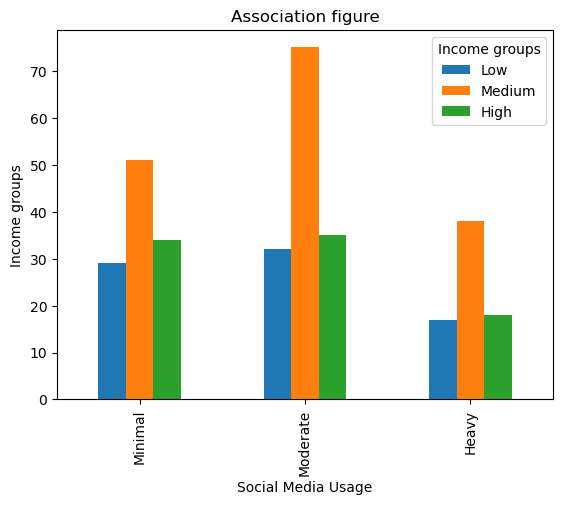

[]

In [24]:
Association(UK_df,['Social Media Usage'],['Income groups'])

The study shows that there is no association between social media usage and income even for each country separately. 